# **ES-205 Project** 
## **Comparitive Analysis between SVD and Gradeint Descent on Linear Regression**
### **By:** Ali Vijdaan (2022560)
###     Hamza Amin (2022378)
###     Maaz Hamid (2022655)
###     Ali Raza (2022664)

#### **Importing Libraries** 

In [1]:
import pandas as pd
import pyreadr  #pip install pyreadr -q -- apply this if pyreadr is not giving Error
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
from numpy import array
from numpy.linalg import pinv
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

#### **Data Preprocessing**

In [2]:
result = pyreadr.read_r(r"C:\Users\alivi\Desktop\Ali Vijdaan\Jupyter Notebooks\ES-205 Project\movies.RData") # Read .rdata file
# Extract the dataframe from the result
df = result["movies"]  # Assuming the dataframe is the first object in the RData file

# Convert the dataframe to a CSV file
csv_file_path = r"C:\Users\alivi\Desktop\Ali Vijdaan\Jupyter Notebooks\ES-205 Project\movies.csv"   #To Sir Babar: input the path where you want to download the csv file here
df.to_csv(csv_file_path, index=False)  # Save as CSV without the index

# Display the first few rows of the CSV file
df = pd.read_csv(csv_file_path)
df.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [3]:
#Show all Column Titles
print(list(df.columns))

['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url']


In [4]:
#Showing data with Selected Colomns
selected_columns = ['title', 'mpaa_rating','genre', 'critics_score', 'audience_score']
s_df = df[selected_columns] #s_df indicates selected dataframe
s_df.head(15)

,title,mpaa_rating,genre,critics_score,audience_score
0,Filly Brown,R,Drama,45.0,73.0
1,The Dish,PG-13,Drama,96.0,81.0
2,Waiting for Guffman,R,Comedy,91.0,91.0
3,The Age of Innocence,PG,Drama,80.0,76.0
4,Malevolence,R,Horror,33.0,27.0
5,Old Partner,Unrated,Documentary,91.0,86.0
6,Lady Jane,PG-13,Drama,57.0,76.0
7,Mad Dog Time,R,Drama,17.0,47.0
8,Beauty Is Embarrassing,Unrated,Documentary,90.0,89.0
9,The Snowtown Murders,Unrated,Drama,83.0,66.0


In [5]:
#Checking for Null Values in Selected Data
null_counts = s_df.isnull().sum()
print(null_counts)

title             0
mpaa_rating       0
genre             0
critics_score     0
audience_score    0
dtype: int64


#### **Plotting Correlations**

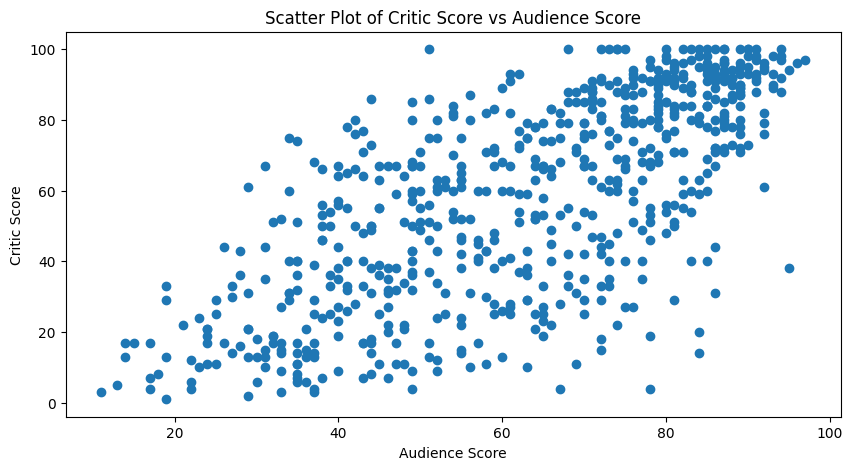

In [6]:
x = s_df['audience_score']
y = s_df['critics_score']

plt.figure(figsize=(10, 5)) #(width, height)

plt.scatter(x, y)

plt.title('Scatter Plot of Critic Score vs Audience Score')
plt.xlabel('Audience Score')
plt.ylabel('Critic Score')

plt.show()

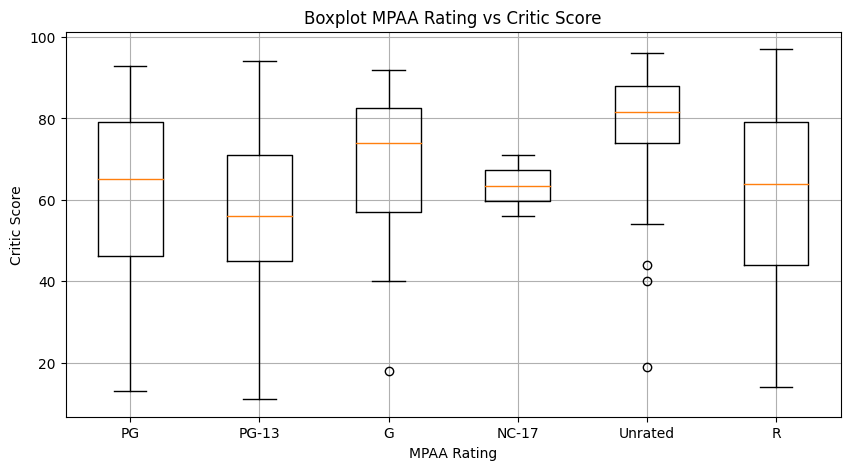

In [7]:
# Creating a boxplot 
plt.figure(figsize=(10, 5))  
plt.boxplot([s_df[s_df['mpaa_rating'] == 'PG']['audience_score'],
             s_df[s_df['mpaa_rating'] == 'PG-13']['audience_score'],
             s_df[s_df['mpaa_rating'] == 'G']['audience_score'],
             s_df[s_df['mpaa_rating'] == 'NC-17']['audience_score'],
             s_df[s_df['mpaa_rating'] == 'Unrated']['audience_score'],
             s_df[s_df['mpaa_rating'] == 'R']['audience_score']],
            labels=['PG', 'PG-13', 'G', 'NC-17', 'Unrated', 'R'])

plt.title('Boxplot MPAA Rating vs Critic Score')  
plt.xlabel('MPAA Rating')  
plt.ylabel('Critic Score')  
plt.grid(True)  

plt.show()  

#### **Gradient Descent**

In [8]:
def gradient_descent(x, y):
  
  m_curr = 0    #Initialzing our predictions for gradeint
  b_curr = 0    #Initialzing our predictions for y-intercept
  iterations = 1000
  n = len(x)
  learning_rate = 0.000001

  res_m = []
  res_b = []
  res_mse = []

  start_time_gd = time.time()   #Starting Timer for Comparative Analysis of Efficiency

  for i in range(iterations):
    y_hat = m_curr * x + b_curr  #Equation for line of predicted values

    mse = (1/n) * sum((y - y_hat)**2)
    res_mse.append(mse)

    Dm = (-2/n) * sum(x*(y - y_hat))  #Partial Derivative wrt m
    Db = (-2/n) * sum(y - y_hat)  #Partial Derivative wrt y-intercept

    #Updating m and y-intercept
    m_curr = m_curr - (learning_rate * Dm)
    res_m.append(m_curr)
    b_curr = b_curr - (learning_rate * Db)
    res_b.append(b_curr)

  #Ending Timer
  end_time_gd = time.time()     
  execution_time_gd = end_time_gd - start_time_gd
  print("Execution Time for Gradient Descent:", execution_time_gd)
  
  #Printing Results
  print(f"Gradient: {m_curr}")
  print(f"Intercepts: {b_curr}")
  print(f"Mean Squared Error: {mse}")
  
  #Finding Memory Usage
  memory_usage_m_curr = sys.getsizeof(m_curr)
  memory_usage_b_curr = sys.getsizeof(b_curr)
  memory_usage_iterations = sys.getsizeof(iterations)
  memory_usage_n = sys.getsizeof(n)
  memory_usage_learning_rate = sys.getsizeof(learning_rate)
  memory_usage_y_hat = sys.getsizeof(y_hat)
  memory_usage_mse = sys.getsizeof(mse)
  memory_usage_Dm = sys.getsizeof(Dm)
  memory_usage_Db = sys.getsizeof(Db)

  total_memory_usage = (
        memory_usage_m_curr + memory_usage_b_curr + memory_usage_iterations +
        memory_usage_n + memory_usage_learning_rate + memory_usage_y_hat +
        memory_usage_mse + memory_usage_Dm + memory_usage_Db
    )

  print("Total Estimated Memory Usage:", total_memory_usage, "bytes")

  return res_m, res_b, res_mse, m_curr, b_curr

In [9]:
m, c, mse, grad, y_int = gradient_descent(x, y)

Execution Time for Gradient Descent: 0.7696182727813721
Gradient: 0.9307861342402942
Intercepts: 0.01274515594358499
Mean Squared Error: 407.4918887787872
Total Estimated Memory Usage: 5572 bytes


#### **Showing Dependancy of Gradient Descend on Learning Rate**

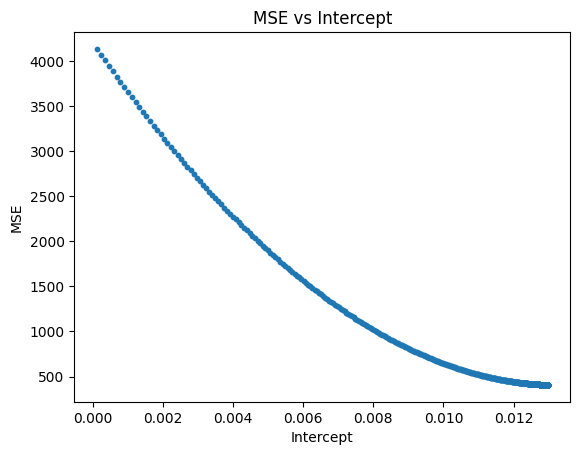

In [12]:
plt.scatter(c, mse, s = 10)

plt.title('MSE vs Intercept')
plt.xlabel('Intercept')
plt.ylabel('MSE')

plt.show()

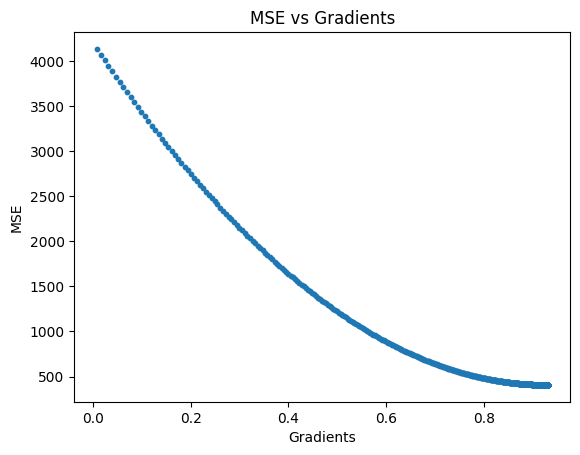

In [13]:
plt.scatter(m, mse, s = 10)

plt.title('MSE vs Gradients')
plt.xlabel('Gradients')
plt.ylabel('MSE')


plt.show()

#### **Results of Gradient Descent**

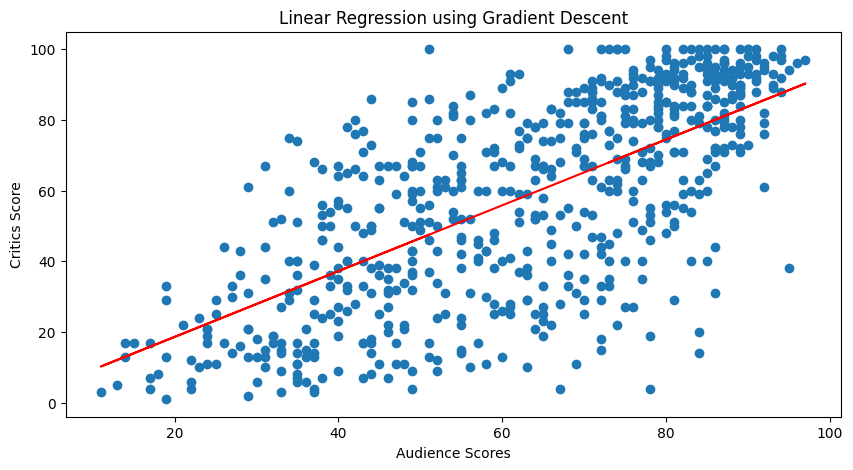

In [45]:
y_hat = grad * x + y_int

plt.figure(figsize=(10, 5)) #(width, height)
plt.scatter(x, y)
plt.plot(x, y_hat, color = 'red')

plt.title("Linear Regression using Gradient Descent")
plt.xlabel('Audience Scores')
plt.ylabel('Critics Score')

plt.show()

#### **SVD METHOD 1**

Gradient: [0.93113811]
Execution Time for SVD: 0.0009980201721191406
Total Estimated Memory Usage: 5680 bytes


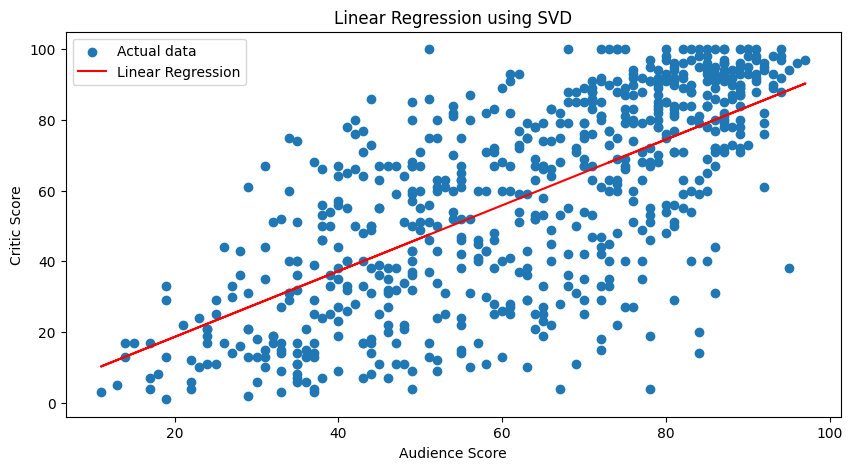

In [47]:
# Assuming your CSV has columns named 'critics_score' and 'audience_rating'
X = s_df['audience_score'].values
Y = s_df['critics_score'].values

# Reshape X to a column vector
X = X.reshape((len(X), 1))

start_time_svd = time.time()

# Calculate coefficients
b = np.linalg.pinv(X).dot(Y)
print("Gradient:", b)

# Predict using coefficients
yhat = X.dot(b)

end_time_svd = time.time()
execution_time_svd = end_time_svd - start_time_svd
print("Execution Time for SVD:", execution_time_svd)

memory_usage_X = sys.getsizeof(X)
memory_usage_y = sys.getsizeof(Y)
memory_usage_b = sys.getsizeof(b)
memory_usage_yhat = sys.getsizeof(yhat)

total_memory_usage = memory_usage_X + memory_usage_y + memory_usage_b + memory_usage_yhat
print("Total Estimated Memory Usage:", total_memory_usage, "bytes")


# Plot data and predictions
plt.figure(figsize=(10, 5)) #(width, height)
plt.scatter(X, Y, label='Actual data')
plt.plot(X, yhat, color='red', label='Linear Regression')
plt.title('Linear Regression using SVD')
plt.xlabel('Audience Score')
plt.ylabel('Critic Score')
plt.legend()
plt.show()

#### **SVD METHOD 2**

In [49]:
x = s_df['audience_score'].values.reshape(-1, 1)
y = s_df['critics_score'].values.reshape(-1, 1)

start_time_svd = time.time()

reg = linear_model.LinearRegression()
reg.fit(x, y)

end_time_svd = time.time()
execution_time_svd = end_time_svd - start_time_svd
print("Execution Time for SVD:", execution_time_svd)

Execution Time for SVD: 0.001995563507080078


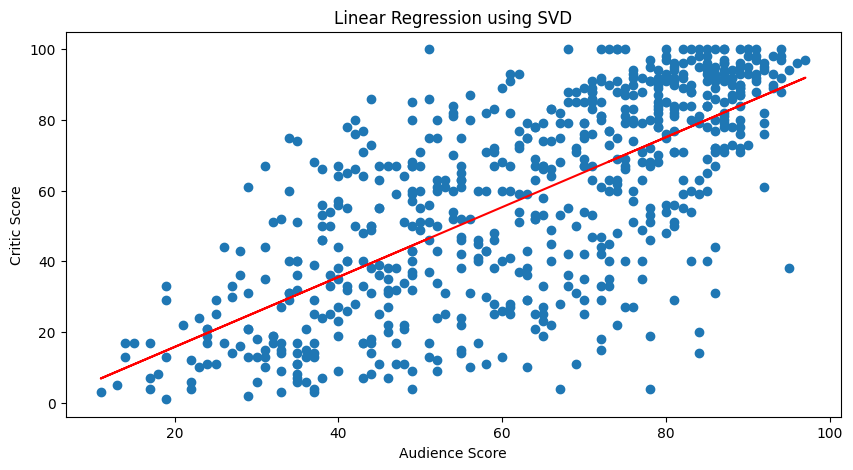

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, reg.predict(x), color = 'red')
plt.title('Linear Regression using SVD')
plt.xlabel('Audience Score')
plt.ylabel('Critic Score')

plt.show()

#### **THE BELOW CODE DOES NOT BELONG TO THE REPORT SUBMITTED**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 477.1002705961618
R-squared (R2): 0.38642748741190003
Root Mean Squared Error (RMSE): 21.842625084823524


#### **ACCURACY**

In [61]:
# Observed Value: 407.4918887787872 as from our code above
# True Value: 477.1002705961618 from library above

obs_val = 407.4918887787872
tru_val = 477.1002705961618

acc = 100 - abs((((obs_val - tru_val) / tru_val) * 100))
print(f"Accuracy = {acc}%")

Accuracy = 85.41011478983333%


In [ ]:
#R-squared = 0.386 which signifies that this dataset is not the best when it comes to predictions via Lienar Regression